In [ ]:
#Colab link = https://colab.research.google.com/drive/1nseete5huZlWM7Ak0qL-T75Dbk0mdr-Z?usp=sharing#scrollTo=PLy3pthUS0D2
#Web = https://towardsdatascience.com/10-minutes-to-building-a-cnn-binary-image-classifier-in-tensorflow-4e216b2034aa


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

local_zip = '/content/drive/MyDrive/Demo_Projects/BinaryImageClassifier/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Demo_Projects/BinaryImageClassifier/files')

local_zip = '/content/drive/MyDrive/Demo_Projects/BinaryImageClassifier/valid.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Demo_Projects/BinaryImageClassifier/files')   
      
zip_ref.close()

In [ ]:
import os
# Directory with our training dandelion pictures
train_dandelion_dir = os.path.join('/content/drive/MyDrive/Demo_Projects/BinaryImageClassifier/files/train/dandelion')

# Directory with our training grass pictures
train_grass_dir = os.path.join('/content/drive/MyDrive/Demo_Projects/BinaryImageClassifier/files/train/grass')

# Directory with our validation dandelion pictures
valid_dandelion_dir = os.path.join('/content/drive/MyDrive/Demo_Projects/BinaryImageClassifier/files/valid/dandelion')

# Directory with our validation grass pictures
valid_grass_dir = os.path.join('/content/drive/MyDrive/Demo_Projects/BinaryImageClassifier/files/valid/grass')

In [ ]:
train_dandelion_names = os.listdir(train_dandelion_dir)
print(train_dandelion_names[:10])

train_grass_names = os.listdir(train_grass_dir)
print(train_grass_names[:10])

validation_dandelion_hames = os.listdir(valid_dandelion_dir)
print(validation_dandelion_hames[:10])

validation_grass_names = os.listdir(valid_grass_dir)
print(validation_grass_names[:10])

['00000428.jpg', '00000400.jpg', '00000366.jpg', '00000372.jpg', '00000414.jpg', '00000399.jpg', '00000158.jpg', '00000164.jpg', '00000170.jpg', '00000038.jpg']
['00000428.jpg', '00000400.jpg', '00000366.jpg', '00000372.jpg', '00000414.jpg', '00000399.jpg', '00000158.jpg', '00000164.jpg', '00000170.jpg', '00000038.jpg']
['00000038.jpg', '00000010.jpg', '00000004.jpg', '00000005.jpg', '00000011.jpg', '00000039.jpg', '00000007.jpg', '00000013.jpg', '00000012.jpg', '00000006.jpg']
['00000038.jpg', '00000010.jpg', '00000004.jpg', '00000005.jpg', '00000011.jpg', '00000039.jpg', '00000007.jpg', '00000013.jpg', '00000012.jpg', '00000006.jpg']


In [ ]:
print('total training dandelion images:', len(os.listdir(train_dandelion_dir)))
print('total training grass images:', len(os.listdir(train_grass_dir)))
print('total validation dandelion images:', len(os.listdir(valid_dandelion_dir)))
print('total validation grass images:', len(os.listdir(valid_grass_dir)))

total training dandelion images: 500
total training grass images: 499
total validation dandelion images: 92
total validation grass images: 65


In [ ]:
#Matplotlib is a plotting library for the Python programming
#pyplot is a plotting library used for 2D graphics in python programming language
#The image module supports basic image loading, rescaling and display operations

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

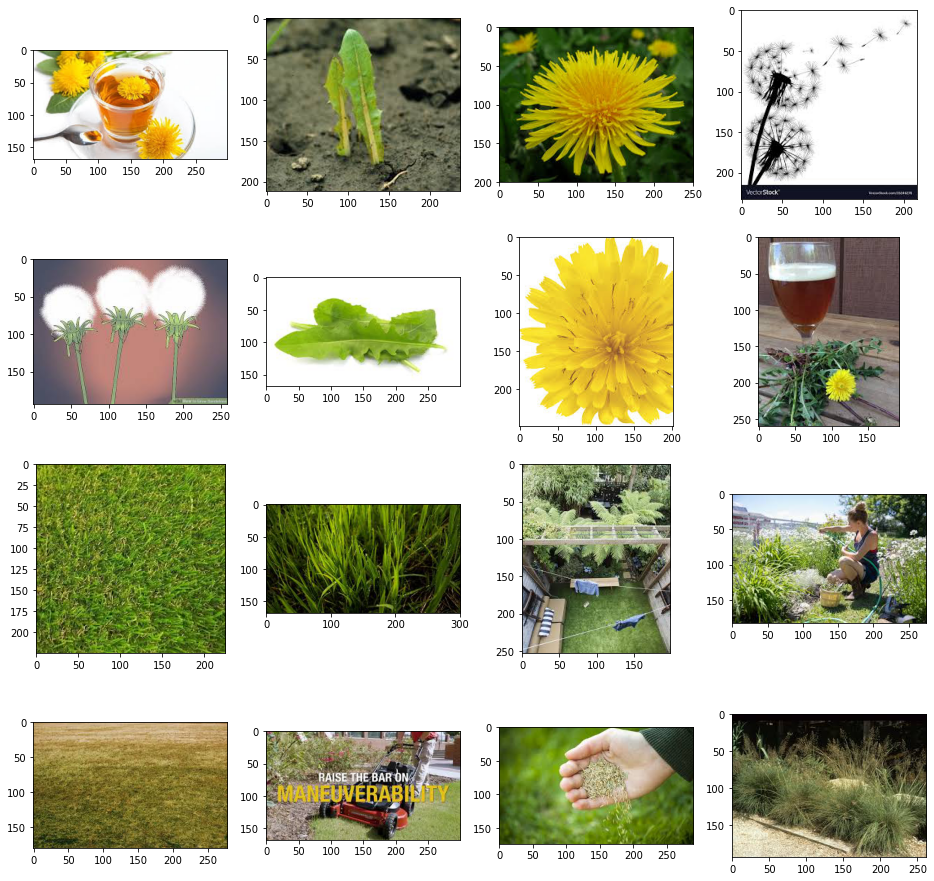

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()                                            # GCF stands for Get Current Figure. plt. gcf() allows you to get a reference to the current figure when using pyplot
fig.set_size_inches(ncols * 4, nrows * 4)                  # used to set the figure size in inches

pic_index += 8
next_dandelion_pic = [os.path.join(train_dandelion_dir, fname) 
                for fname in train_dandelion_names[pic_index-8:pic_index]]
next_grass_pic = [os.path.join(train_grass_dir, fname) 
                for fname in train_grass_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_dandelion_pic + next_grass_pic):                  #Enumerate() method adds a counter to an iterable, i = index, img_path =images
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('On')    # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)                                                      # mpimg.imread(img_path) same as plt.imread(img_path) = reads img 
  plt.imshow(img)                                                                   # used to display data as an image

plt.show()                                                                          # show() function in pyplot module of matplotlib library is used to display all figures. 
                                                                                    # Matplotlib is used in a terminal or scripts, plt.show() is a must.
                                                                                    # Matplotlib is used in a IPython shell or a notebook (ex: Kaggle), plt.show() is unnecessary.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/Demo_Projects/BinaryImageClassifier/files/train',  # This is the source directory for training images
        classes = ['dandelion', 'grass'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/MyDrive/Demo_Projects/BinaryImageClassifier/files/valid',  # This is the source directory for training images
        classes = ['dandelion', 'grass'],
        target_size=(200, 200),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)


# Batch_size = For example, if you have 1000 images in your dataset and the batch size is defined as 10. Then the "ImageDataGenerator" 
#              will produce 10 images in each iteration of the training. An iteration is defined as steps per epoch i.e. the total number of samples / batch_size.



Found 999 images belonging to 2 classes.
Found 157 images belonging to 2 classes.


##Building the Model


In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle
from tensorflow import keras
from tensorflow.keras import layers

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
model = tf.keras.models.Sequential([layers.Flatten(input_shape = (200,200,3)), 
                                   layers.Dense(128, activation=tf.nn.relu), 
                                   layers.Dense(1, activation=tf.nn.sigmoid)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 120000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               15360128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 15,360,257
Trainable params: 15,360,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = tf.keras.models.Sequential([layers.Flatten(input_shape = (200,200,3)),   #  flatten function flattens the multi-dimensional input tensors into a single dimension, so you can model your input layer and build your neural network mode
                                   layers.Dense(128, activation="relu"), 
                                   layers.Dense(1, activation="sigmoid")])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 120000)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               15360128  
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 15,360,257
Trainable params: 15,360,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),                #optimizers = makes task efficient and increases acccuracy
              loss = 'binary_crossentropy',                   #The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
              metrics=['accuracy'])                           #A metric is a function that is used to judge the performance of your model.

##Training

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

history = model.fit(
    train_generator,
      steps_per_epoch=8,                                 # Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch. 
      epochs=15,                                         # An epoch is an iteration over the entire x and y data provided.
      verbose=1,                                         # By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch. (design of the progress bar)
      validation_data = validation_generator,            # Data on which to evaluate the loss and any model metrics at the end of each epoch. The model will not be trained on this data.
      validation_steps=8)                                # Total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch


Epoch 1/15
8/8 [==============================] - 5s 502ms/step - loss: 30.7852 - accuracy: 0.5040 - val_loss: 4.4714 - val_accuracy: 0.6053
Epoch 2/15
8/8 [==============================] - 4s 468ms/step - loss: 5.9613 - accuracy: 0.5438 - val_loss: 2.8909 - val_accuracy: 0.6447
Epoch 3/15
8/8 [==============================] - 4s 461ms/step - loss: 3.5122 - accuracy: 0.6359 - val_loss: 5.2003 - val_accuracy: 0.4474
Epoch 4/15
8/8 [==============================] - 4s 473ms/step - loss: 2.6556 - accuracy: 0.6553 - val_loss: 2.0386 - val_accuracy: 0.6316
Epoch 5/15
8/8 [==============================] - 4s 476ms/step - loss: 0.9658 - accuracy: 0.7497 - val_loss: 1.5999 - val_accuracy: 0.5658
Epoch 6/15
8/8 [==============================] - 4s 480ms/step - loss: 0.9041 - accuracy: 0.7543 - val_loss: 1.4176 - val_accuracy: 0.5855
Epoch 7/15
8/8 [==============================] - 4s 446ms/step - loss: 0.6161 - accuracy: 0.7918 - val_loss: 1.1436 - val_accuracy: 0.6382
Epoch 8/15
8/8 [===

In [ ]:
model.evaluate(validation_generator)

9/9 [==============================] - 1s 57ms/step - loss: 2.0055 - accuracy: 0.5159


[2.005486249923706, 0.5159235596656799]

In [ ]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

9/9 [==============================] - 1s 57ms/step


In [ ]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [ ]:
roc_auc = auc(fpr, tpr)          # AUC = Area under the curve

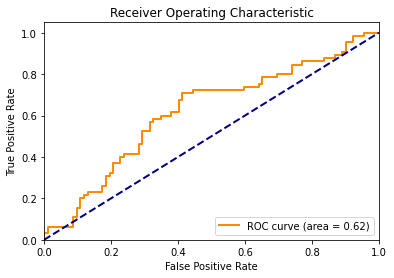

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

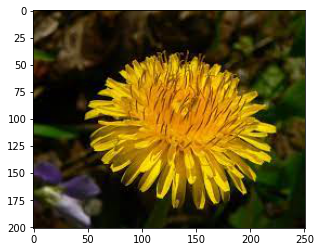

In [ ]:
path = "/content/drive/MyDrive/Demo_Projects/BinaryImageClassifier/dandelion.jfif"
img = mpimg.imread(path)                                                      # mpimg.imread(img_path) same as plt.imread(img_path) = reads img 
plt.imshow(img)

AxesImage(54,36;334.8x217.44)


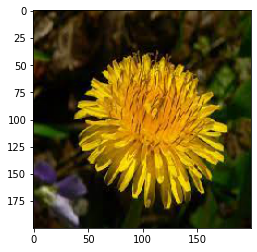

In [ ]:
print(plt.imshow(img))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

[0.]
 is a dandelion


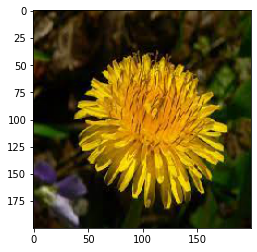

In [ ]:
img = image.load_img(path, target_size=(200, 200))
x = image.img_to_array(img)
plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]<0.5:
  plt.imshow(img)
  print(" is a dandelion")
else:
  plt.imshow(img)
  print(" is a grass")
 

In [ ]:
path = "/content/drive/MyDrive/Demo_Projects/BinaryImageClassifier/grass.jfif"
img = mpimg.imread(path)  

[1.]
 is a grass


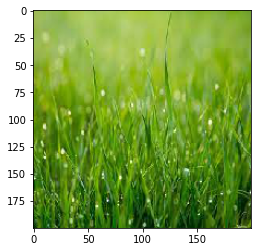

In [ ]:
img = image.load_img(path, target_size=(200, 200))
x = image.img_to_array(img)                                 # converts image to numpy array
plt.imshow(x/255.)
x = np.expand_dims(x, axis=0)                               # The expand_dims() function is used to expand the shape of an array
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]<0.5:
  plt.imshow(img)
  print(" is a dandelion")
else:
  plt.imshow(img)
  print(" is a grass")
 

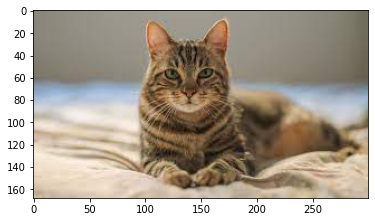

In [ ]:
path = "/content/drive/MyDrive/Demo_Projects/BinaryImageClassifier/download.jfif"
img = mpimg.imread(path)                                                      # mpimg.imread(img_path) same as plt.imread(img_path) = reads img 
plt.imshow(img)  

In [ ]:
from numpy import asarray
data = asarray(img)
print(data.shape)


(168, 300, 3)
